#### Generate a Toy dataset for linear regression. Assume that the model follows a line $(Y = mx + c)$ to generate the $1000$ point and Add white noise to all the points generated. Take $70%$ generated points at random and use it to find the model (line in this example). Plot original line and the computed line along with data points. What is the MSE for the training and test data used

In [2]:
import numpy as np
import matplotlib.pyplot as plot



Let slope $(M) = 1$ and Y-intercept $(C) = 0$ :

In [5]:
x_points = np.random.rand(1000,1)

m = 1
c = 0

y_points = m*x_points + c

Design of Gaussian noise:

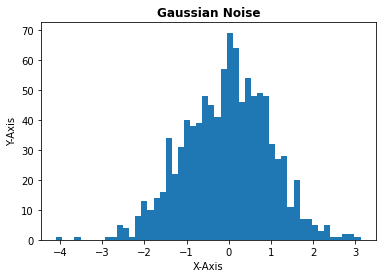

In [3]:
y_noise = np.random.randn(1000, 1)

plot.hist(y_noise, bins=50)  
plot.xlabel('X-Axis') 
plot.ylabel('Y-Axis') 
plot.title('Gaussian Noise', fontweight ="bold")
plot.show()

Adding above noise to y:

Text(0, 0.5, 'Y-Axis')

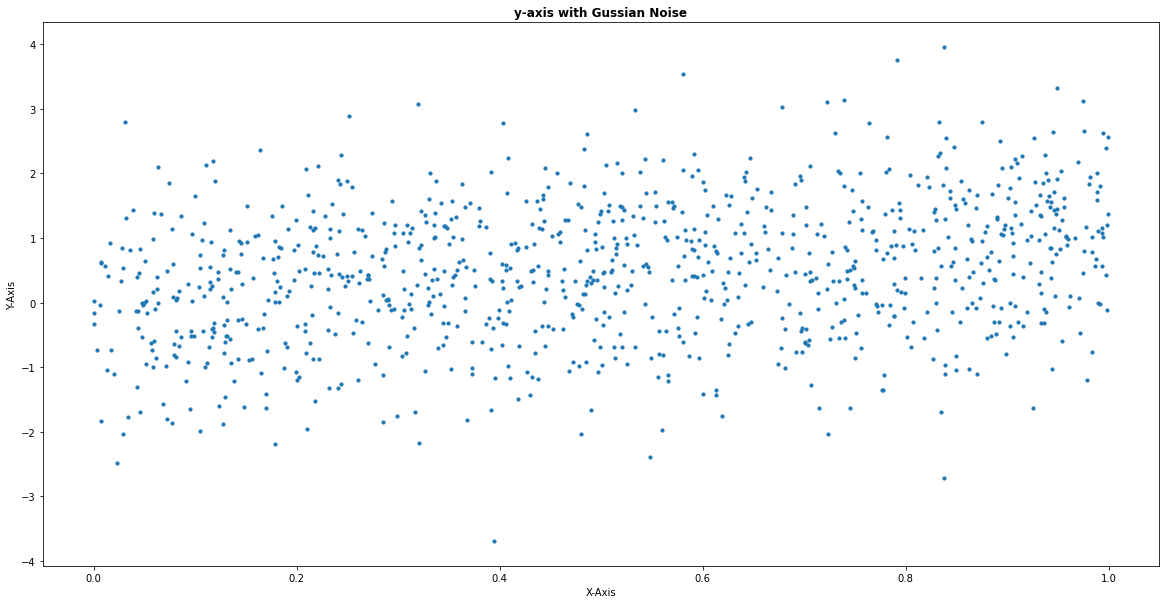

In [4]:
y_points = y_points + y_noise

plot.figure(figsize=(20,10))
plot.scatter(x_points, y_points, s=10)
plot.title('y-axis with Gussian Noise', fontweight ="bold")
plot.xlabel('X-Axis') 
plot.ylabel('Y-Axis') 

Take 70% of data for training and remaining data for testing: 

Text(0, 0.5, 'Y-Axis')

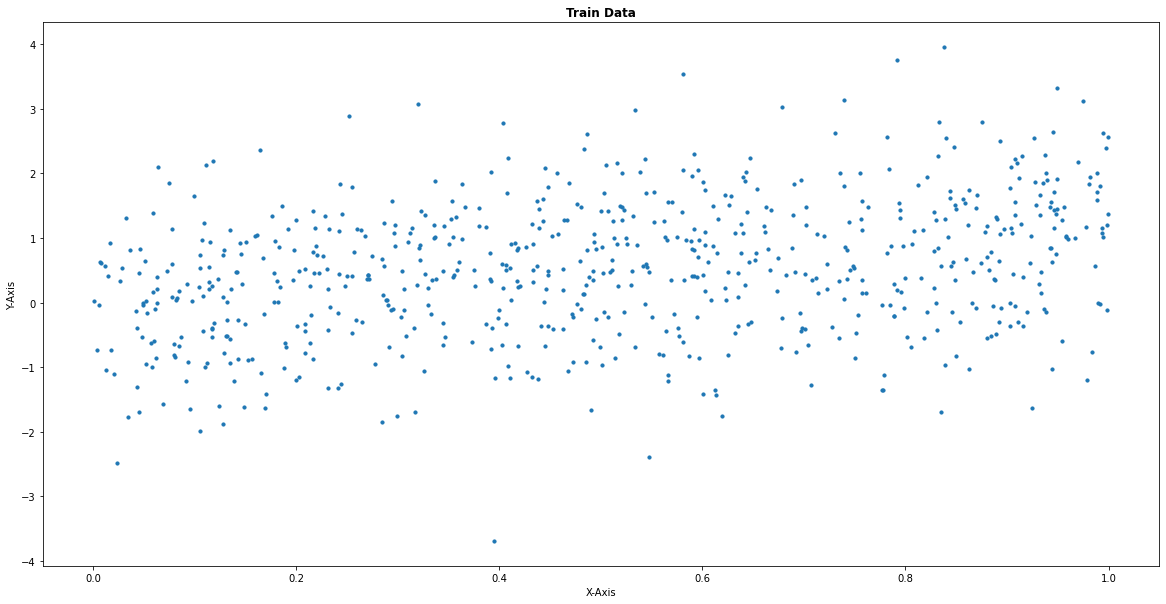

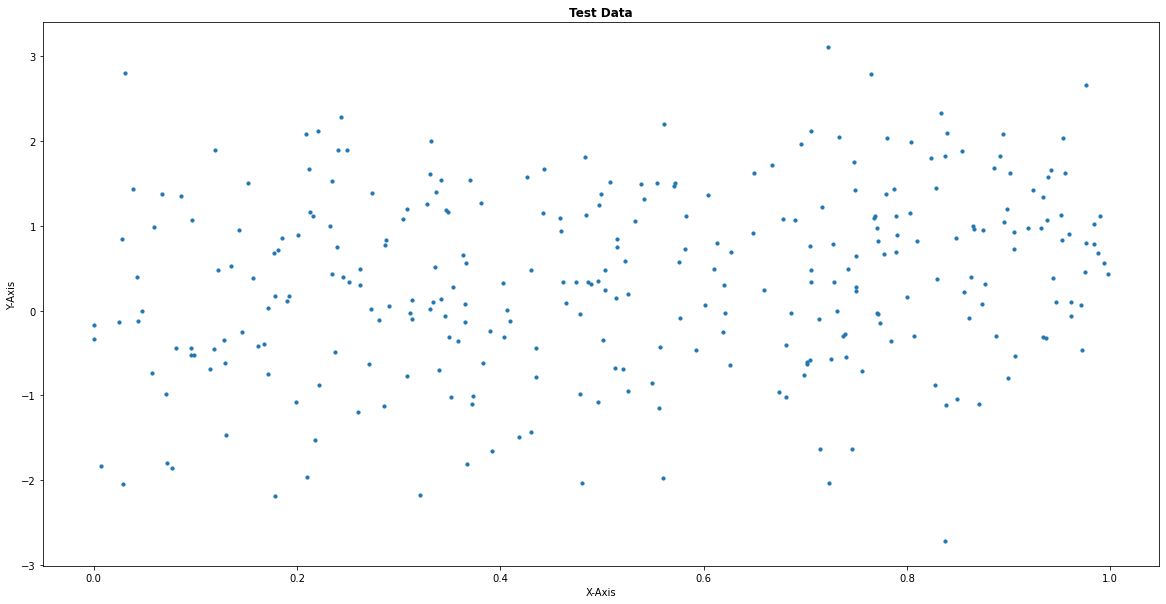

In [5]:
Data_Train = np.hstack((np.expand_dims(x_points,axis=1),np.expand_dims(y_points,axis=1)))

N = len(Data_Train)
Train_Test = int(N * (70/100))    # i,e Train_Test = 700

Train_Data, Test_Data = Data_Train[:Train_Test], Data_Train[Train_Test:]
x_Data, y_Data = Data_Train[:,0], Data_Train[:,1]

Train_x, Train_y = x_Data[:Train_Test], y_Data[:Train_Test]
Test_x, Test_y = x_Data[Train_Test:], y_Data[Train_Test:]

plot.figure(figsize = (20,10))
plot.scatter(Train_x,Train_y, s=10)
plot.title('Train Data', fontweight ="bold")
plot.xlabel('X-Axis') 
plot.ylabel('Y-Axis')

plot.figure(figsize = (20,10))
plot.scatter(Test_x,Test_y, s=10)
plot.title('Test Data', fontweight ="bold")
plot.xlabel('X-Axis') 
plot.ylabel('Y-Axis')

Convert X to (X and ones matrix):

In [6]:
x_oneTrain, x_oneTest = np.append(Train_x,np.ones((len(Train_x),1)),axis=1), np.append(Test_x,np.ones((len(Test_x),1)),axis=1)
x_oneTest

array([[8.04029390e-01, 1.00000000e+00],
       [7.69499298e-02, 1.00000000e+00],
       [7.71217158e-01, 1.00000000e+00],
       [7.28256880e-01, 1.00000000e+00],
       [2.74070787e-01, 1.00000000e+00],
       [2.21978473e-01, 1.00000000e+00],
       [5.90015766e-02, 1.00000000e+00],
       [8.38658443e-01, 1.00000000e+00],
       [1.99258676e-01, 1.00000000e+00],
       [5.20712363e-01, 1.00000000e+00],
       [4.43283378e-01, 1.00000000e+00],
       [7.84069567e-01, 1.00000000e+00],
       [7.01312592e-01, 1.00000000e+00],
       [6.09732507e-01, 1.00000000e+00],
       [1.51489463e-01, 1.00000000e+00],
       [5.41610647e-01, 1.00000000e+00],
       [3.66730583e-01, 1.00000000e+00],
       [4.61779266e-01, 1.00000000e+00],
       [1.85094518e-01, 1.00000000e+00],
       [7.16497889e-01, 1.00000000e+00],
       [5.07901209e-01, 1.00000000e+00],
       [1.61961801e-01, 1.00000000e+00],
       [9.75629690e-01, 1.00000000e+00],
       [5.70715561e-01, 1.00000000e+00],
       [2.495425

Setting up initial thetta matrix:

In [7]:
thetta = np.array([[0], [0]])

Find cost function or MSE:

In [8]:
def cost_function(X, Y, Thetta):
    
    J = np.sum((X.dot(thetta)-Y)**2)*1/len(Y)
    
    return J

Apply Gradient descent:

In [9]:
def gradient_descent(X, Y, thetta, alpha, iteration):
    
    Cost_history = [0] * iteration
    n = len(Y)
    
    for iteration in range(iteration):
        
        y_predict = X.dot(thetta)
        Gradient  = (1/n)*(X.T.dot(y_predict - Y))
        thetta    = thetta - (alpha*Gradient)
        
        Cost      = cost_function(X, Y, thetta)
        Cost_history[iteration] = Cost

        if (Cost>Cost_history[iteration-1]):
            alpha = alpha*0.01
            
    return thetta, y_predict

### Training:

In [10]:
Thetta_Train, y_predict = gradient_descent(x_oneTrain, Train_y, thetta, 0.5, 10000)
m, c = Thetta_Train
Y_new = y_predict

print("Value of slope, M: ",m ,"\nValue of Y intercept, C: ", c, "\n\n")

Value of slope, M:  [0.94520147] 
Value of Y intercept, C:  [0.06475192] 




Mean Squared Error or MSE of training:

In [11]:
MSE = np.sum((Train_y - Y_new)**2)/len(Train_y)
print("Mean squared error or MSE of Training: ", MSE, "\n\n")

Mean squared error or MSE of Training:  0.949748683205866 




Plotting graph of training:

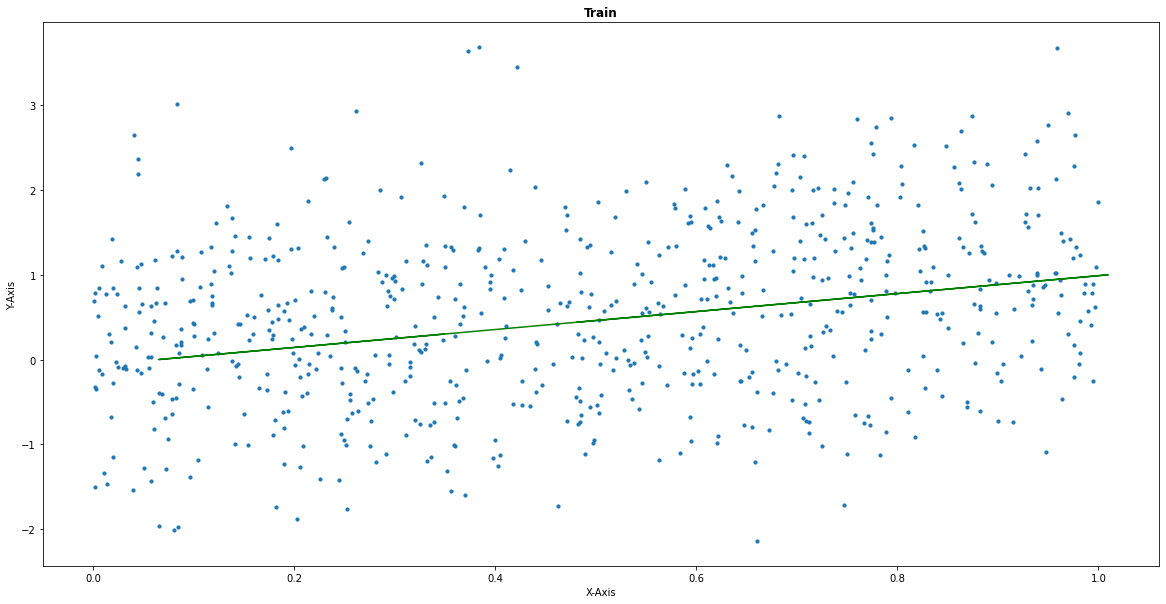

In [12]:
Train_Y = m*Train_x + c

plot.figure(figsize = (20, 10))
plot.scatter(Train_x,Train_y, s=10)
plot.title('Train', fontweight ="bold")
plot.xlabel('X-Axis') 
plot.ylabel('Y-Axis')
plot.plot(Train_Y, Train_x, color='g')

### Testing:

In [13]:
Thetta_Test, y_predict = gradient_descent(x_oneTest, Test_y, thetta, 0.5, 10000)
Y_New = y_predict

m_Test, c_Test = Thetta_Train
print("Value of slope, M: ",m ,"\nValue of Y intercept, C: ", c, "\n\n")

Value of slope, M:  [0.94520147] 
Value of Y intercept, C:  [0.06475192] 




Mean Squared Error or MSE of testing:

In [14]:
MSE = np.sum((Test_y - Y_New)**2)/len(Test_y)
print("Mean squared error or MSE of Testing: ", MSE)

Mean squared error or MSE of Testing:  0.9411445230601598


Plotting graph of testing:

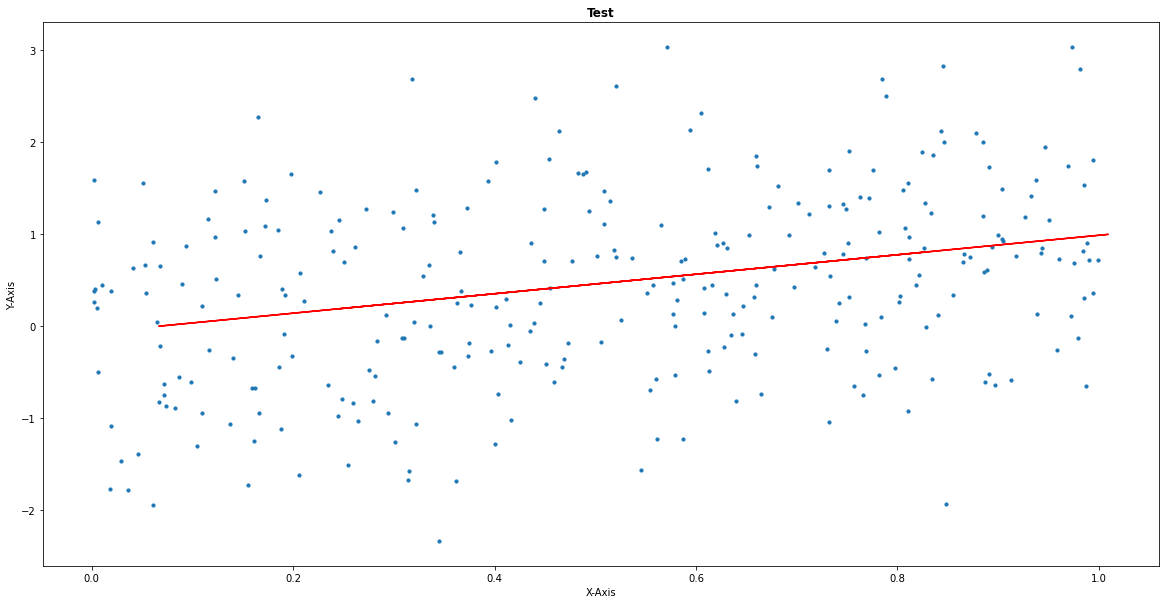

In [15]:
Test_Y = m*Test_x + c

plot.figure(figsize = (20,10))
plot.scatter(Test_x,Test_y, s=10)
plot.title('Test', fontweight ="bold")
plot.xlabel('X-Axis') 
plot.ylabel('Y-Axis')
plot.plot(Test_Y, Test_x, color='r')